In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [ ]:
def process_csv(folder_path):
    input_csv_file_path = os.path.join(folder_path, 'processed_step_5.csv')
    output_csv_file_path = os.path.join(folder_path, 'processed_step_6.csv')

    df = pd.read_csv(input_csv_file_path)

    origins = df[['origin_x', 'origin_y']].values

    origin_z = []

    for i in range(len(df)):
        depth_path = os.path.join(folder_path, 'processed_depth', f'depth_data_{i + 1}.bin')
        if not os.path.exists(depth_path):
            origin_z.append(None)
            continue
        
        origin = origins[i]
        
        with open(depth_path, 'rb') as f:
            depth_data = f.read()
            depth_array = np.frombuffer(depth_data, dtype=np.uint16)
            width = 640
            height = 480
            depth_frame = depth_array.reshape((height, width)) / 10000

            padding_x = -5
            padding_y = -10
            
            clear_output(wait=True)
            plt.figure(figsize=(5, 5))
            plt.imshow(depth_frame, cmap='viridis')
            if not np.isnan(origin).any():
                plt.scatter(origin[0] + padding_x, origin[1] + padding_y, c='red', marker='x', label='Origin')
            plt.title(depth_path)
            display(plt.gcf())
        
            origin_depth = depth_frame[int(origin[1] + padding_y), int(origin[0] + padding_x)] if not np.isnan(origin).any() else None
            
            origin_z.append(origin_depth)

    df['origin_z'] = origin_z

    df.to_csv(output_csv_file_path, index=False)

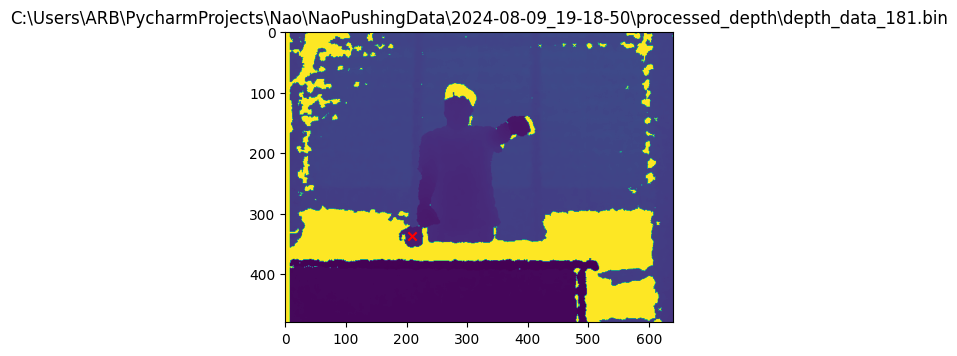

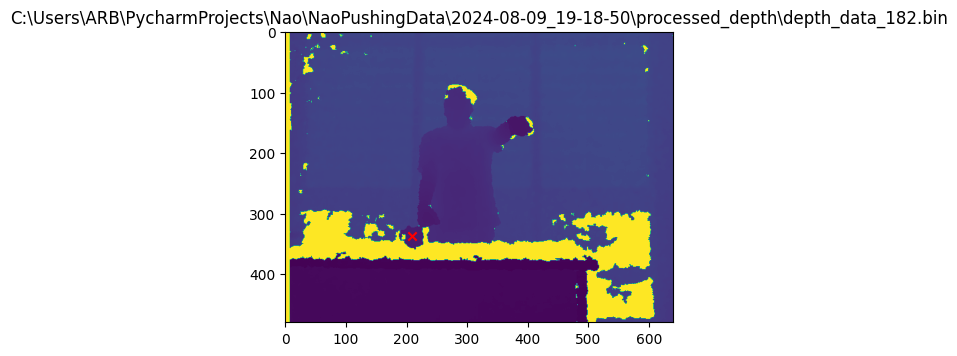

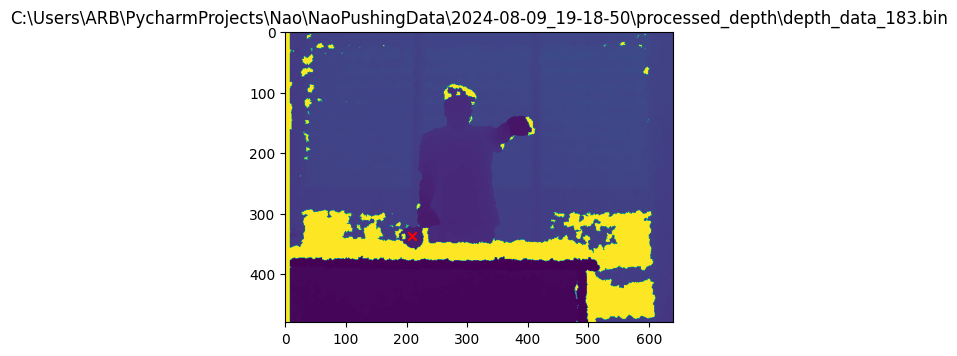

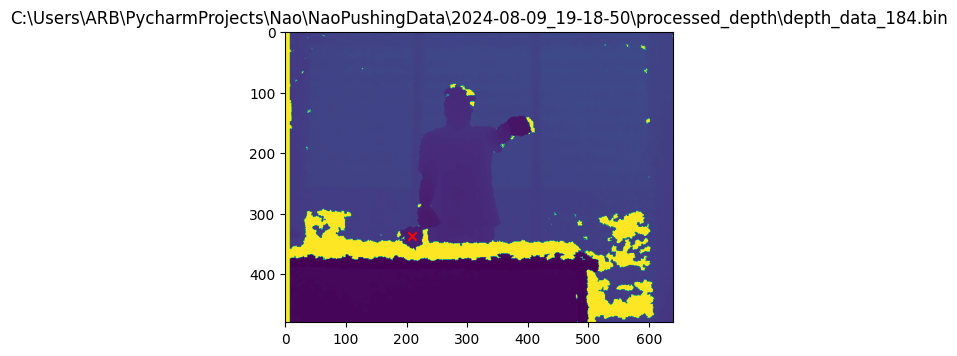

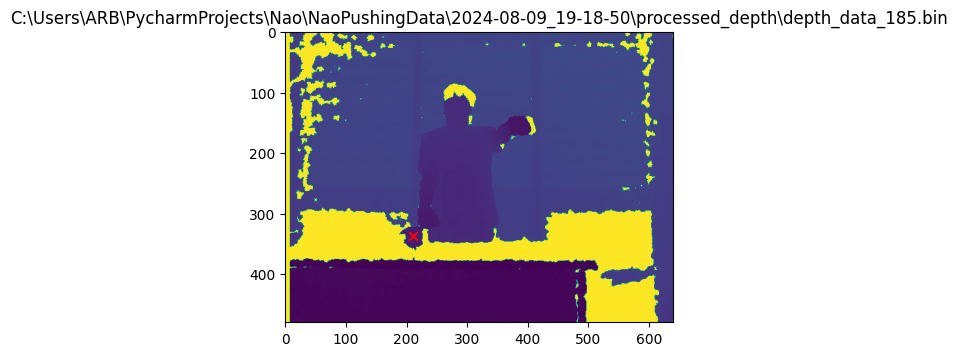

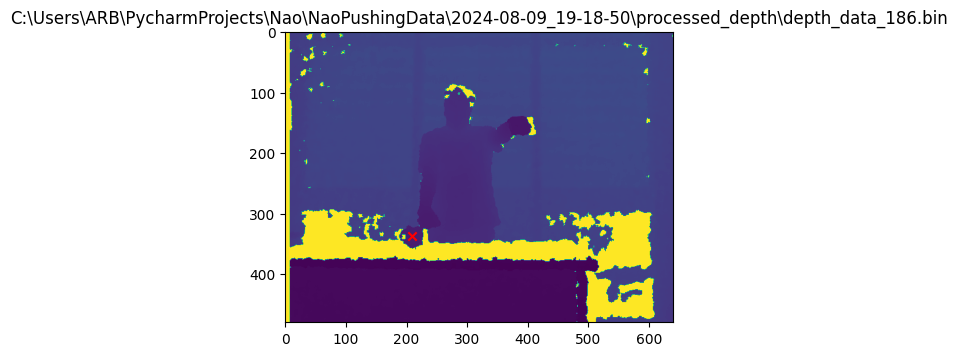

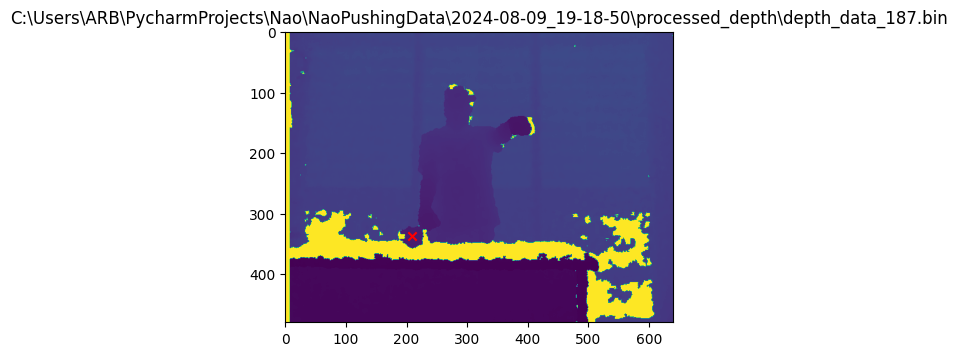

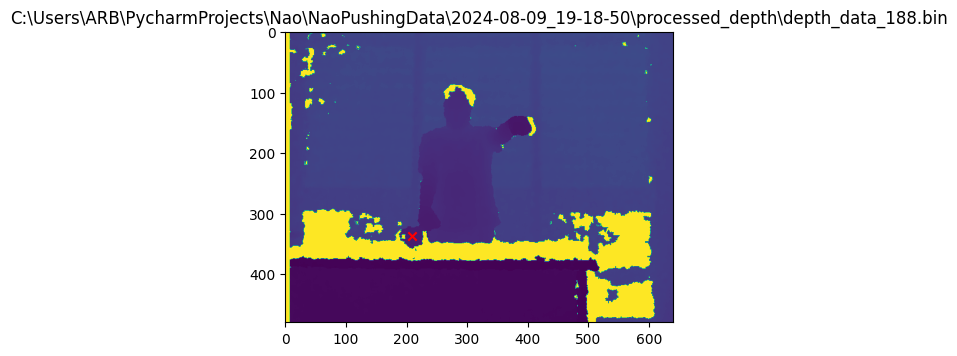

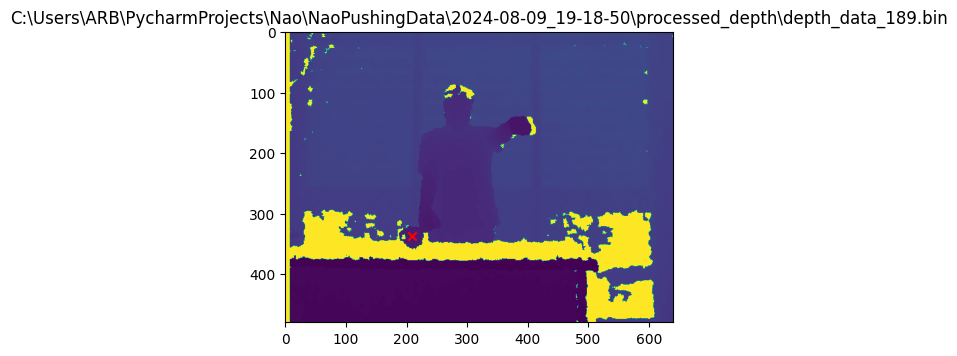

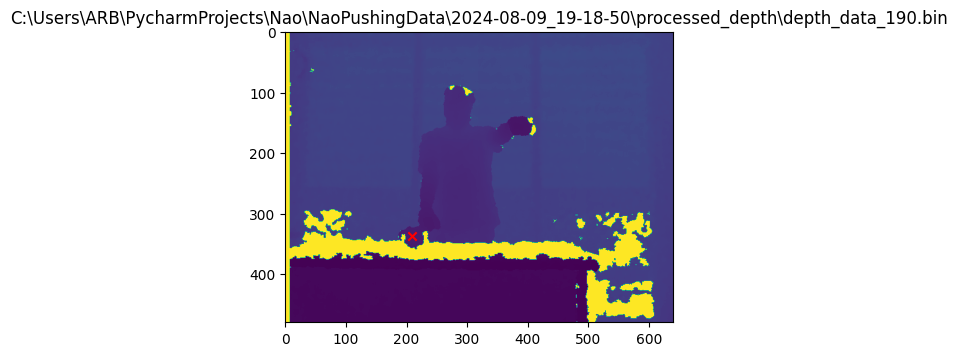

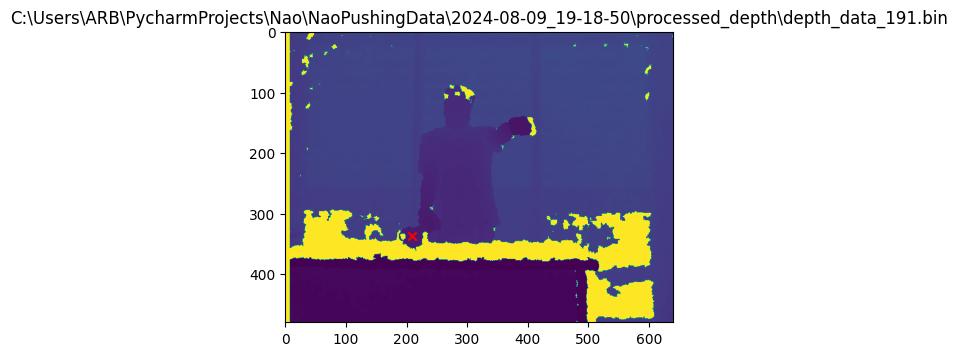

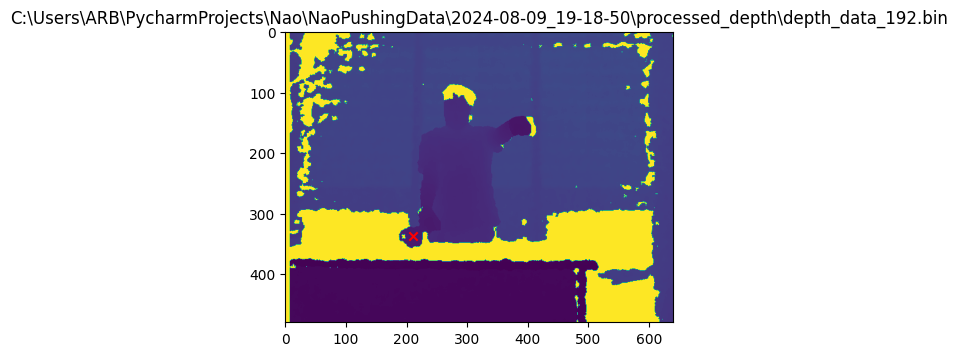

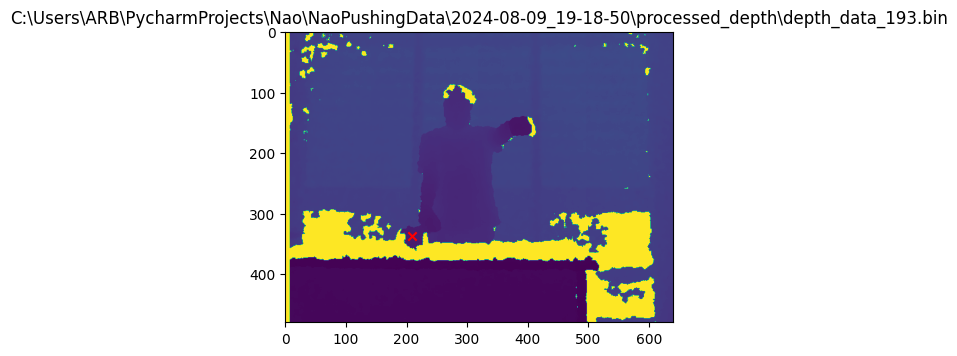

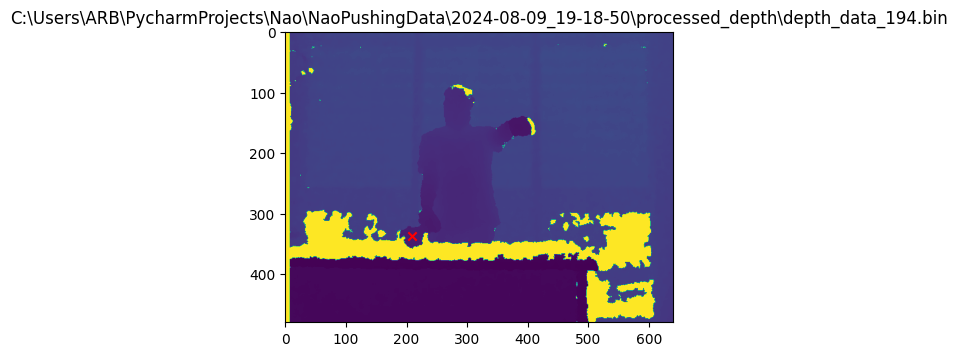

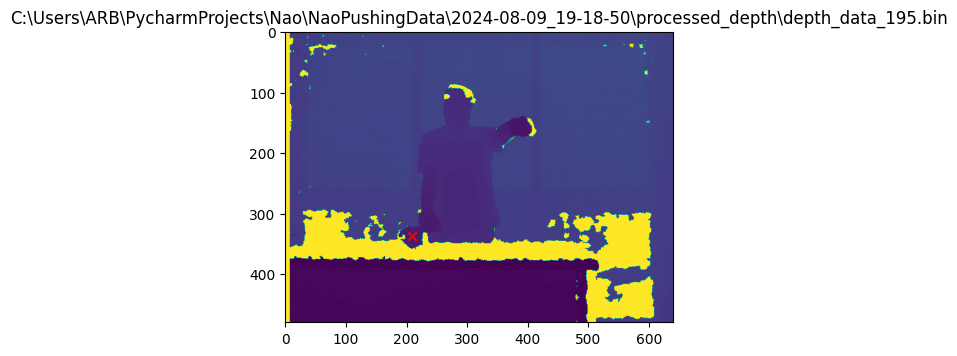

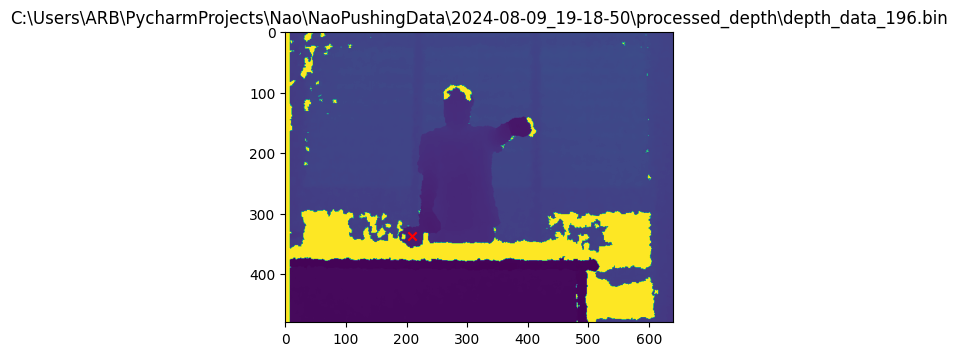

Error in callback <function flush_figures at 0x0000020F50B21C60> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [3]:
base_folder = r'.\NaoPushingData'
for folder in os.listdir(base_folder):
    folder_path = os.path.join(base_folder, folder)
    if os.path.isdir(folder_path) and 'processed_step_5.csv' in os.listdir(folder_path) and 'processed_step_6.csv' not in os.listdir(folder_path):
        process_csv(folder_path)